In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import intake 
import pprint
from src.LE_LoadAndMerge import *
import warnings
warnings.filterwarnings("ignore")

#### Get the data

In [2]:
# US East
USeast = MultiModelLargeEnsemble(models=['cesm_lens','ACCESS-ESM1-5','CanESM5','EC-Earth3','GISS-E2-1-G',
                                      'MIROC6','MPI-ESM1-2-LR'],
                              variable='pr', granularity='Amon', lat=41.3, lon=-72.5,
                              bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

In [3]:
USwest = MultiModelLargeEnsemble(models=['cesm_lens','ACCESS-ESM1-5','CanESM5','EC-Earth3','GISS-E2-1-G',
                                      'MIROC6','MPI-ESM1-2-LR'],
                              variable='pr', granularity='Amon', lat=37.7,lon=-122.4,
                              bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

In [4]:
iceland = MultiModelLargeEnsemble(models=['cesm_lens','ACCESS-ESM1-5','CanESM5','EC-Earth3','GISS-E2-1-G',
                                      'MIROC6','MPI-ESM1-2-LR'],
                              variable='pr', granularity='Amon', lat=65,lon=-19,
                              bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

In [5]:
europe = MultiModelLargeEnsemble(models=['cesm_lens','ACCESS-ESM1-5','CanESM5','EC-Earth3','GISS-E2-1-G',
                                      'MIROC6','MPI-ESM1-2-LR'],
                              variable='pr', granularity='Amon', lat=51,lon=10.5,
                              bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

In [6]:
australia = MultiModelLargeEnsemble(models=['cesm_lens','ACCESS-ESM1-5','CanESM5','EC-Earth3','GISS-E2-1-G',
                                      'MIROC6','MPI-ESM1-2-LR'],
                              variable='pr', granularity='Amon', lat=-25.2,lon=133.7,
                              bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

In [7]:
tropics = MultiModelLargeEnsemble(models=['cesm_lens','ACCESS-ESM1-5','CanESM5','EC-Earth3','GISS-E2-1-G',
                                      'MIROC6','MPI-ESM1-2-LR'],
                              variable='pr', granularity='Amon', lat=3.9,lon=-53.1,
                              bucket='climateai_data_repository', path='tmp/internal_variability',load=True)

In [8]:
tropics.internal_variability

<xarray.Dataset>
Dimensions:            (time: 86, model: 7, member: 58)
Coordinates:
  * time               (time) datetime64[ns] 2015-01-01 ... 2100-01-01
  * model              (model) <U13 'cesm_lens' ... 'MPI-ESM1-2-LR'
  * member             (member) int64 0 1 2 3 4 5 6 7 ... 51 52 53 54 55 56 57
    member_id          (member, model) object 1.0 'r4i1p1f1' ... nan nan
Data variables: (12/15)
    pr_ref             (model) float32 5.895e-08 5.031e-05 ... 1.259e-05
    pr                 (time, member, model) float32 nan nan nan ... nan nan nan
    model_le           (time) float32 nan nan nan nan nan ... nan nan nan nan
    internal_le        (time) float32 nan nan nan nan nan ... nan nan nan nan
    total_le           (time) float32 nan nan nan nan nan ... nan nan nan nan
    total_direct_le    (time) float32 nan nan nan nan nan ... nan nan nan nan
    ...                 ...
    internal_fit       float32 29.28
    model_fit          (time) float32 nan nan nan nan nan ... nan nan nan nan
    total_fit          (time) float32 nan nan nan nan nan ... nan nan nan nan
    internal_fit_frac  (time) float32 nan nan nan nan nan ... nan nan nan nan
    model_fit_frac     (time) float32 nan nan nan nan nan ... nan nan nan nan
    total_direct_fit   (time) float32 nan nan nan nan nan ... nan nan nan nan

In [9]:
USwest = USwest.internal_variability
USeast = USeast.internal_variability
iceland = iceland.internal_variability
europe = europe.internal_variability
australia = australia.internal_variability
tropics = tropics.internal_variability

#### make some plots 

Text(0, 0.5, 'Model and Total Uncertainty (%)')

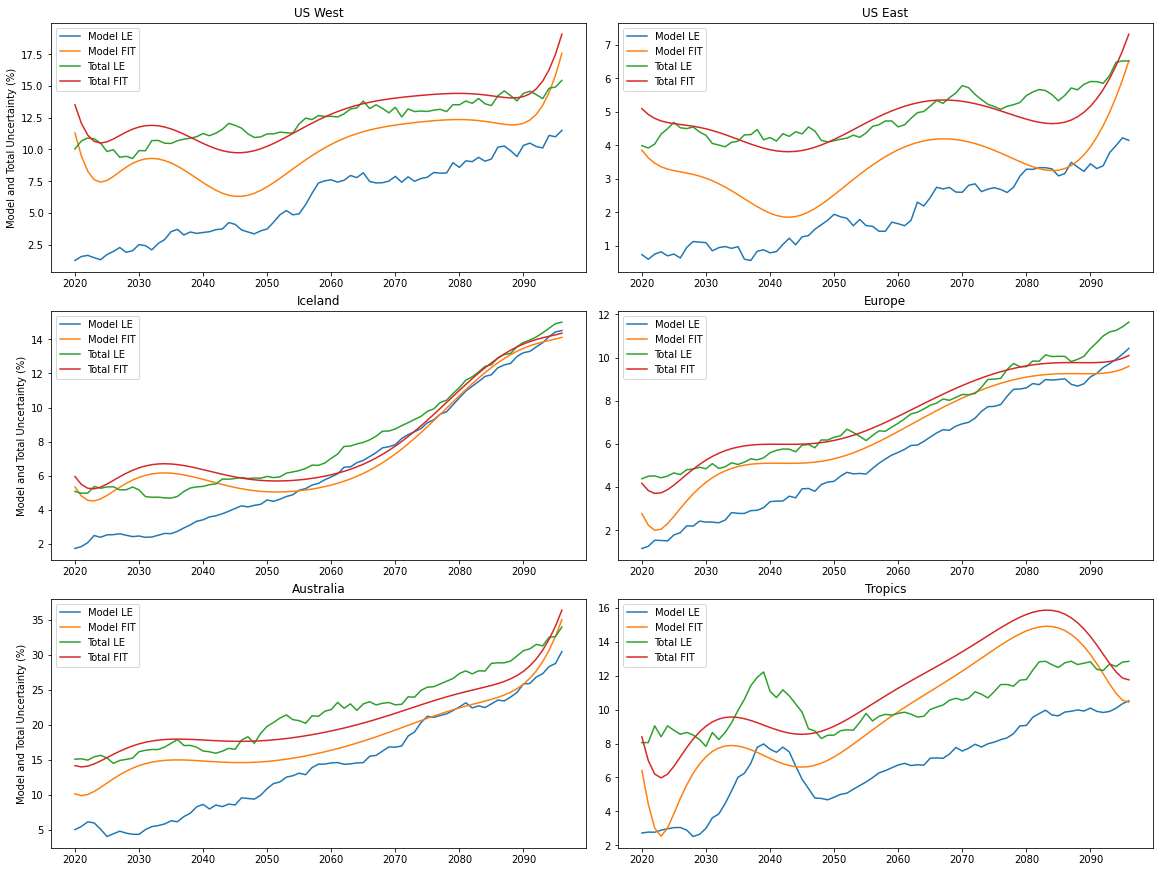

In [10]:
# plot model uncertainty and total uncertainty 
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

regions = [USwest,USeast,iceland,europe,australia,tropics]
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
titles = ['US West','US East','Iceland','Europe','Australia','Tropics']
for axis,region,title in zip(axes,regions,titles):
    axis.plot(region.time,np.sqrt(region.model_le),label='Model LE')
    axis.plot(region.time,np.sqrt(region.model_fit),label='Model FIT')
    axis.plot(region.time,np.sqrt(region.total_le),label='Total LE')
    axis.plot(region.time,np.sqrt(region.total_fit),label='Total FIT')
    axis.legend()
    axis.set_title(title)
ax[0,0].set_ylabel('Model and Total Uncertainty (%)')
ax[1,0].set_ylabel('Model and Total Uncertainty (%)')
ax[2,0].set_ylabel('Model and Total Uncertainty (%)')

Text(0, 0.5, 'Total Uncertainty (%)')

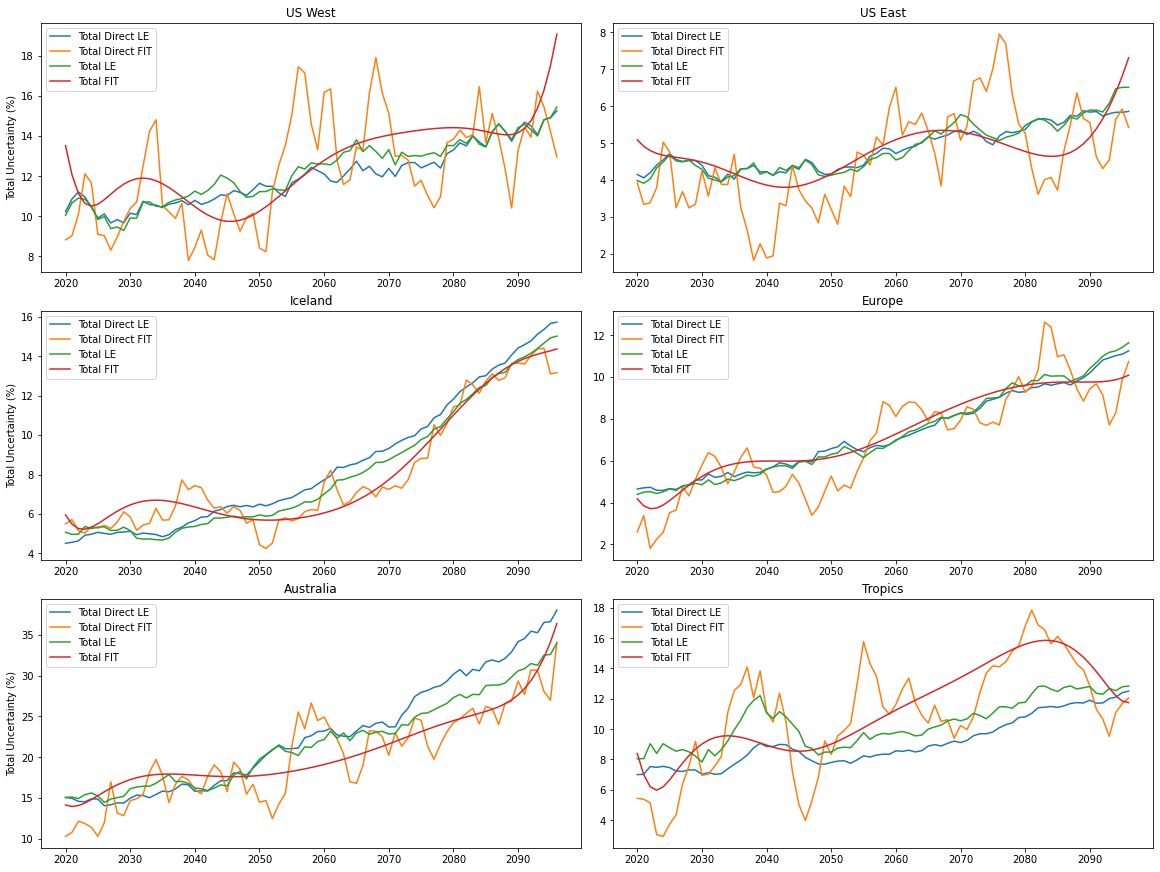

In [11]:
# plot model uncertainty and total uncertainty 
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

regions = [USwest,USeast,iceland,europe,australia,tropics]
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
titles = ['US West','US East','Iceland','Europe','Australia','Tropics']
for axis,region,title in zip(axes,regions,titles):
    axis.plot(region.time,np.sqrt(region.total_direct_le),label='Total Direct LE')
    axis.plot(region.time,np.sqrt(region.total_direct_fit),label='Total Direct FIT')
    axis.plot(region.time,np.sqrt(region.total_le),label='Total LE')
    axis.plot(region.time,np.sqrt(region.total_fit),label='Total FIT')
    axis.legend()
    axis.set_title(title)
ax[0,0].set_ylabel('Total Uncertainty (%)')
ax[1,0].set_ylabel('Total Uncertainty (%)')
ax[2,0].set_ylabel('Total Uncertainty (%)')

Text(0, 0.5, 'Total Uncertainty (%)')

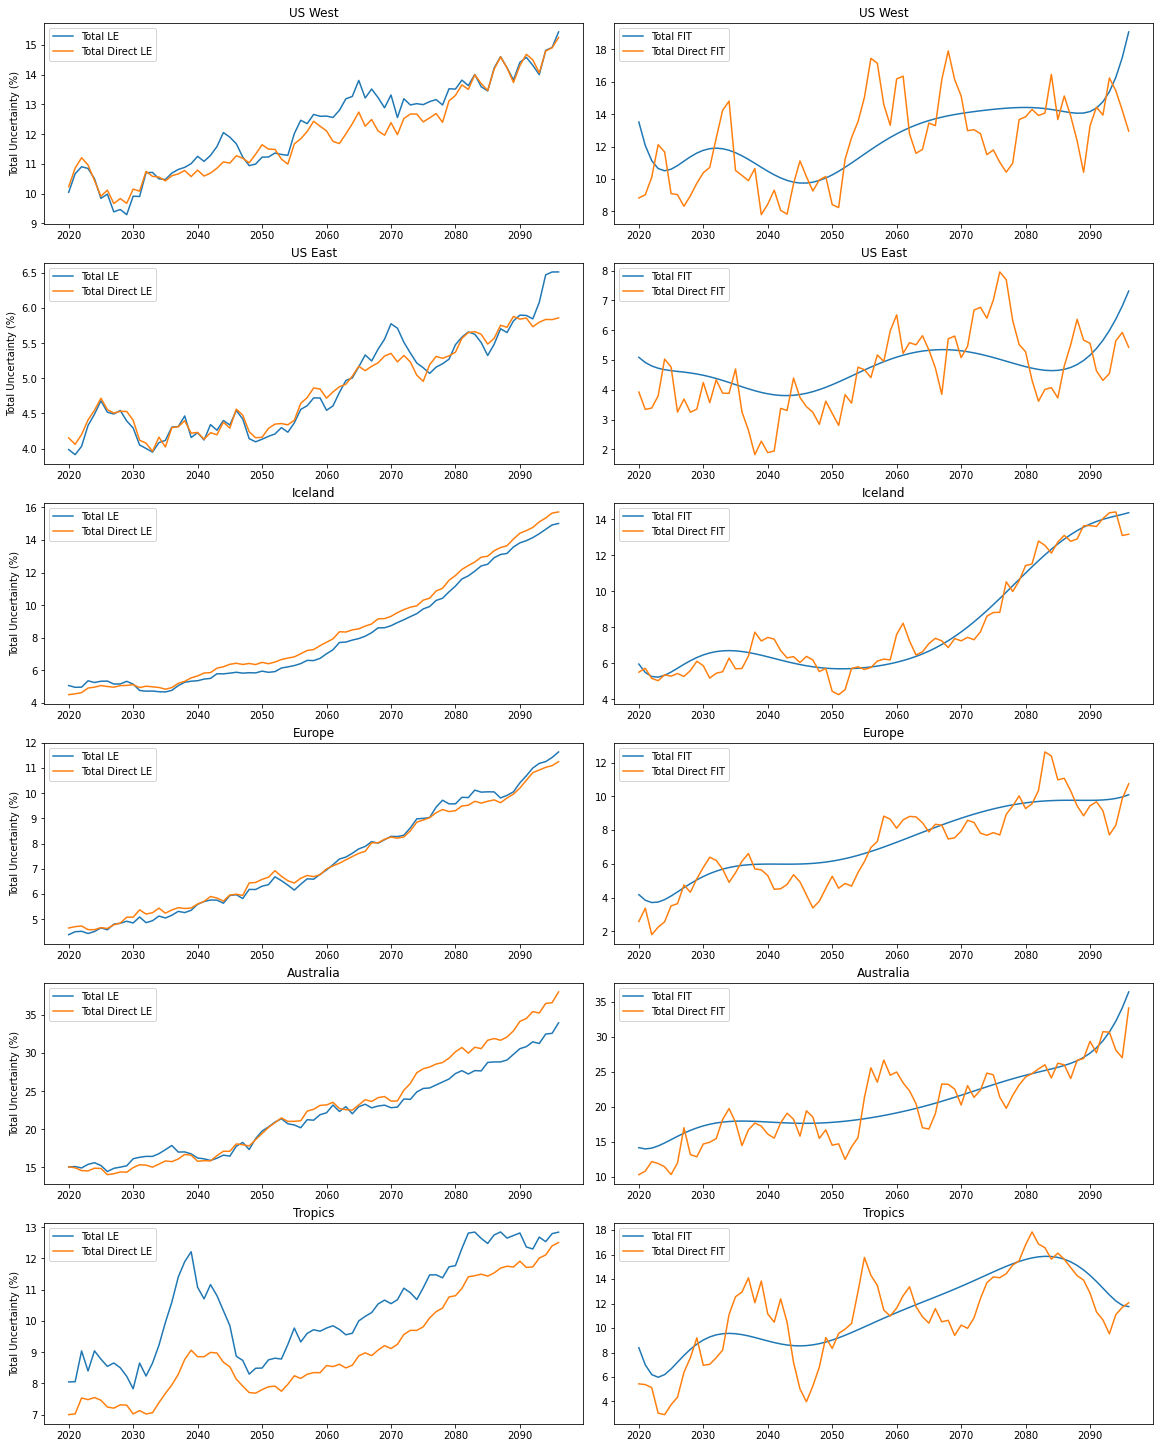

In [12]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

regions = [USwest,USeast,iceland,europe,australia,tropics]
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
titles = ['US West','US East','Iceland','Europe','Australia','Tropics']
for axis,region,title in zip(axes,regions,titles):
    axis.plot(region.time,np.sqrt(region.total_le),label='Total LE')
    axis.plot(region.time,np.sqrt(region.total_direct_le),label='Total Direct LE')
    axis.legend()
    axis.set_title(title)
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region,title in zip(axes,regions,titles):
    axis.plot(region.time,np.sqrt(region.total_fit),label='Total FIT')
    axis.plot(region.time,np.sqrt(region.total_direct_fit),label='Total Direct FIT')
    axis.legend()
    axis.set_title(title)
ax[0,0].set_ylabel('Total Uncertainty (%)')
ax[1,0].set_ylabel('Total Uncertainty (%)')
ax[2,0].set_ylabel('Total Uncertainty (%)')
ax[3,0].set_ylabel('Total Uncertainty (%)')
ax[4,0].set_ylabel('Total Uncertainty (%)')
ax[5,0].set_ylabel('Total Uncertainty (%)')

Text(0, 0.5, 'Internal Variability (%)')

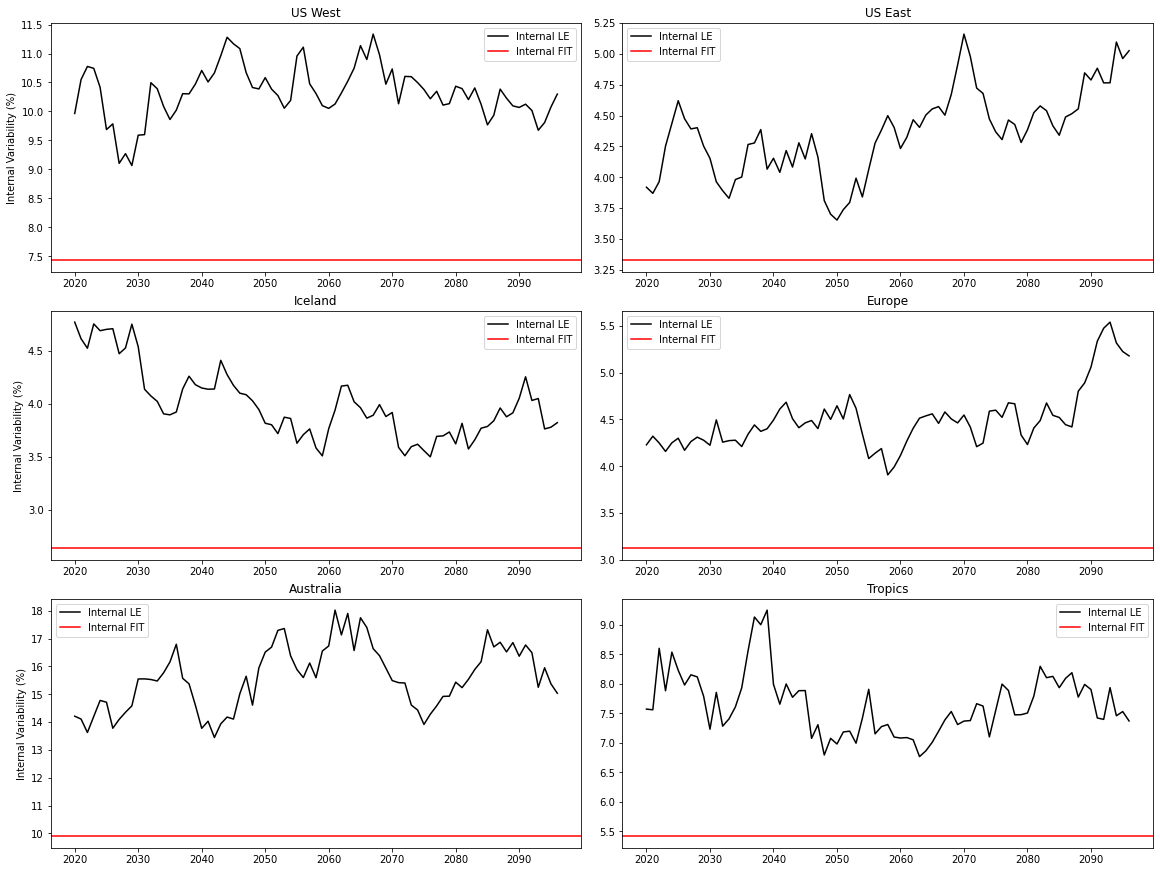

In [14]:
# plot internal variabilities using std dev
fig,ax = plt.subplots(nrows=3,ncols=2, constrained_layout=True,figsize=(16,12))

regions = [USwest,USeast,iceland,europe,australia,tropics]
axes = [ax[0,0],ax[0,1],ax[1,0],ax[1,1],ax[2,0],ax[2,1]]
titles = ['US West','US East','Iceland','Europe','Australia','Tropics']
for axis,region,title in zip(axes,regions,titles):
    axis.plot(region.time,np.sqrt(region.internal_le),label='Internal LE',color='k')
    axis.axhline(np.sqrt(region.internal_fit),label='Internal FIT',color='r')
    axis.legend()
    axis.set_title(title)
ax[0,0].set_ylabel('Internal Variability (%)')
ax[1,0].set_ylabel('Internal Variability (%)')
ax[2,0].set_ylabel('Internal Variability (%)')

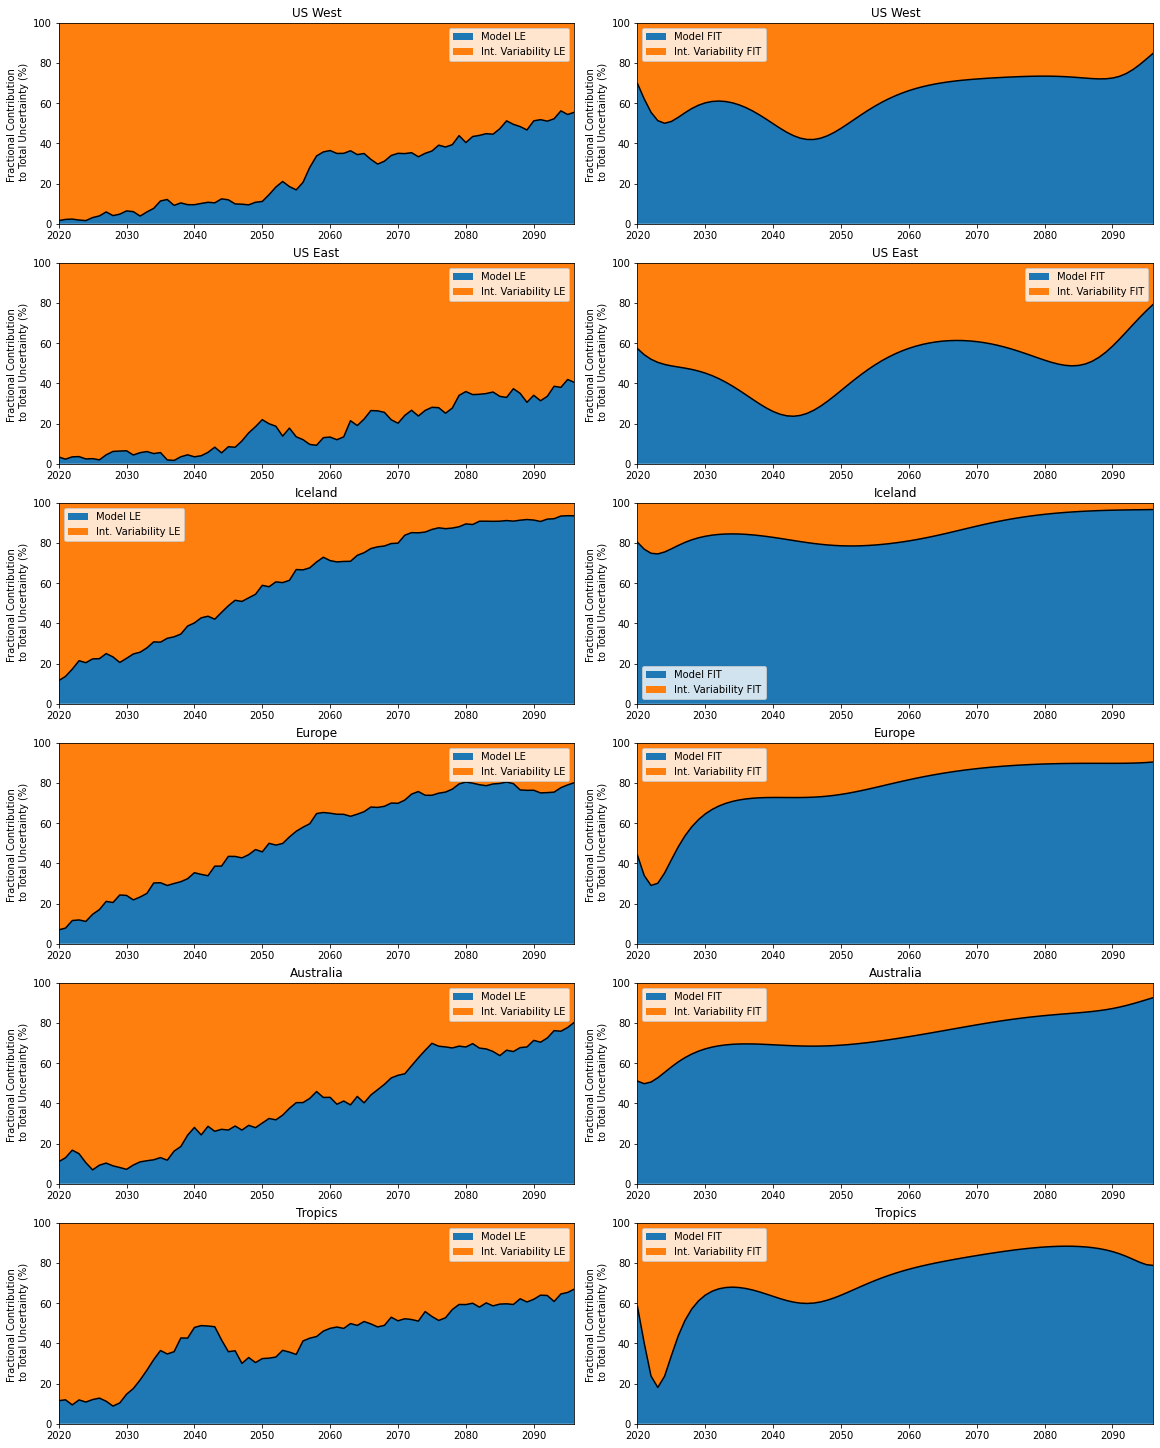

In [15]:
# plot total uncertainty (direct and indirect) 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))

regions = [USwest,USeast,iceland,europe,australia,tropics]
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
titles = ['US West','US East','Iceland','Europe','Australia','Tropics']
for axis,region,title in zip(axes,regions,titles):
    x=region.time
    y=region.model_le_frac
    axis.fill_between(x,y,label='Model LE')
    axis.plot(region.time,region.model_le_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability LE')
    axis.set_ylim(0,100)
    axis.set_ylabel('Fractional Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(title)
    axis.set_xlim(x[5],x[-5])
    
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
for axis,region,title in zip(axes,regions,titles):
    x=region.time
    y=region.model_fit_frac
    axis.fill_between(x,y,label='Model FIT')
    axis.plot(region.time,region.model_fit_frac,color='k')
    axis.fill_between(x,y,100,label='Int. Variability FIT')
    axis.set_ylim(0,100)
    axis.set_ylabel('Fractional Contribution \n to Total Uncertainty (%)')
    axis.legend()
    axis.set_title(title)
    axis.set_xlim(x[5],x[-5])

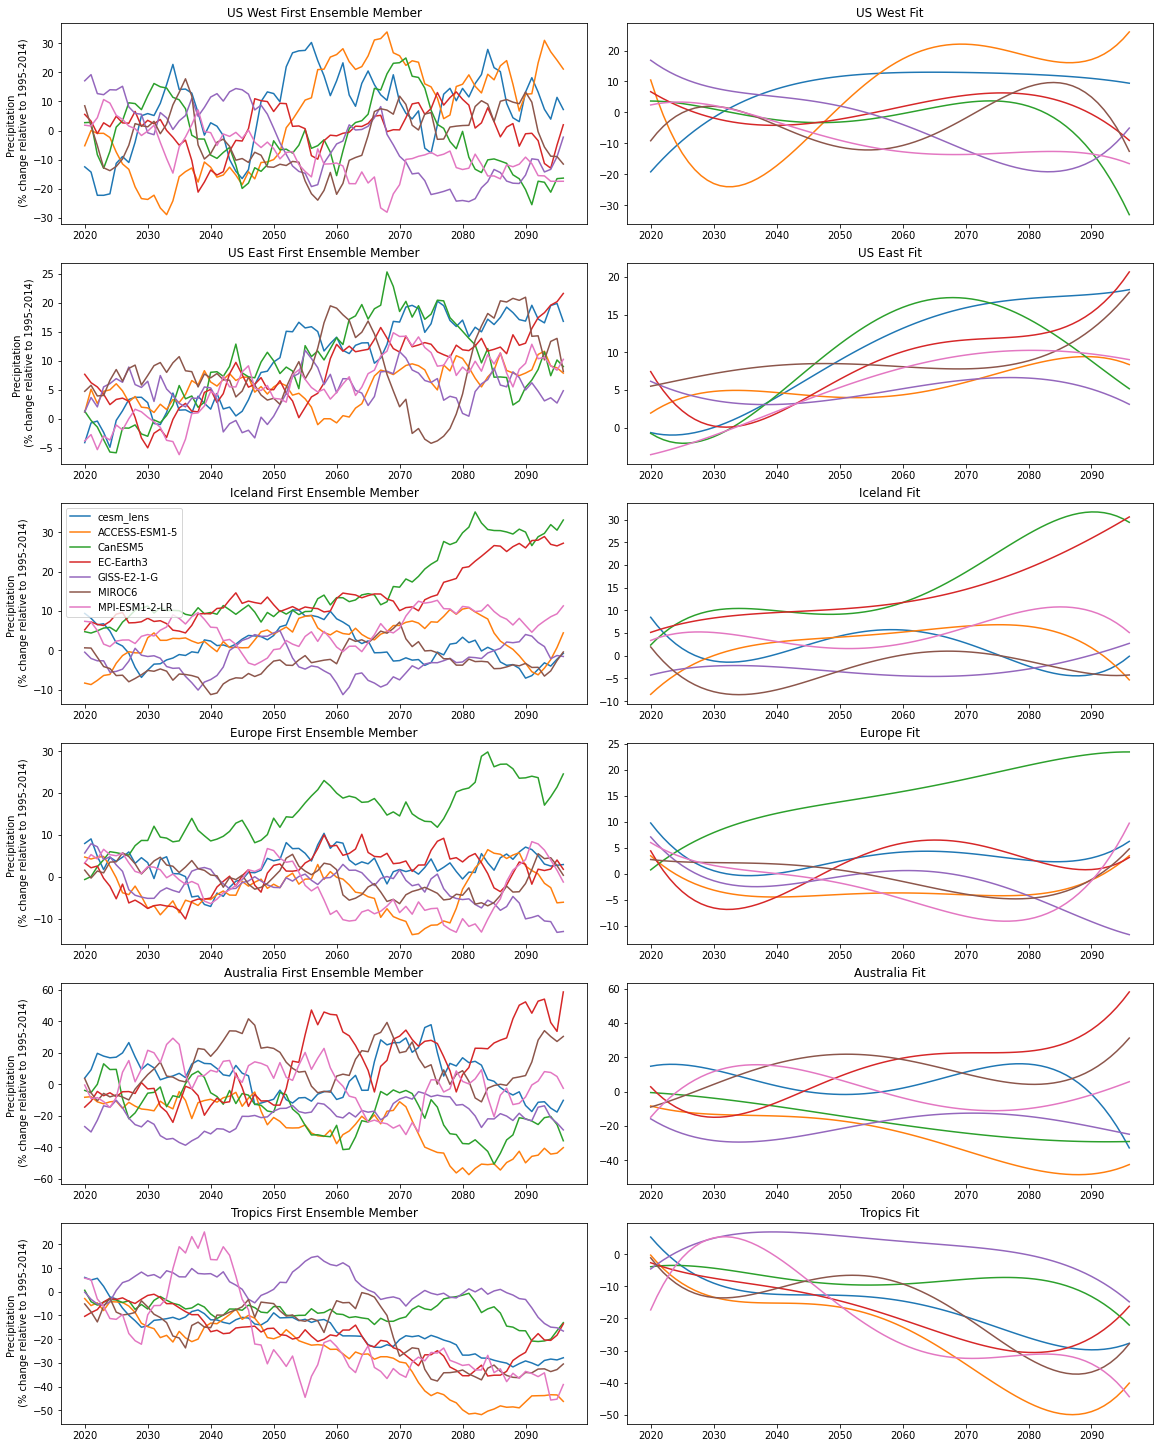

In [16]:
# plot data used for FIT method 
fig,ax = plt.subplots(nrows=6,ncols=2, constrained_layout=True,figsize=(16,20))
models = np.arange(0,7,1)
regions = [USwest,USeast,iceland,europe,australia,tropics]
axes = [ax[0,0],ax[1,0],ax[2,0],ax[3,0],ax[4,0],ax[5,0]]
titles = ['US West First Ensemble Member','US East First Ensemble Member',
          'Iceland First Ensemble Member','Europe First Ensemble Member',
          'Australia First Ensemble Member','Tropics First Ensemble Member']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(region.time,region.isel(model=m).pr.isel(member=0),label=region.model.values[m])
        axis.set_title(title)
        axis.set_ylabel('Precipitation \n (% change relative to 1995-2014)')
ax[2,0].legend()
axes = [ax[0,1],ax[1,1],ax[2,1],ax[3,1],ax[4,1],ax[5,1]]
titles = ['US West Fit','US East Fit',
          'Iceland Fit','Europe Fit',
          'Australia Fit','Tropics Fit']
for axis,region,title in zip(axes,regions,titles):
    for m in models:
        axis.plot(region.time,region.isel(model=m).fit)
        axis.set_title(title)
        